# Read data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/siamese/framingham.csv')

# Simple processing
- copied from code

In [3]:
import random
data['BPMeds'] = data['BPMeds'].fillna(0)
edu = [1,2,3,4]
data['education'] = data['education'].apply(lambda x: random.randint(1,4) if x not in edu else x)

data = data.fillna(0)

data2 = data.copy()
data2['age'] = pd.cut(data2['age'], 5, labels = [1,2,3,4,5])
data2['cigsPerDay'] = pd.cut(data2['cigsPerDay'], 
                           6, 
                           labels = [1, 2, 3, 4, 5, 6])
data2['totChol'] = pd.cut(data2['totChol'], 
                        13, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
data2['sysBP'] = pd.cut(data2['sysBP'], 
                      10, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data2['diaBP'] = pd.cut(data2['diaBP'], 
                      8, 
                      labels = [1, 2, 3, 4, 5, 6, 7, 8])
data2['BMI'] = pd.cut(data2['BMI'], 
                    10, 
                    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
data2['heartRate'] = pd.cut(data2['heartRate'], 
                          8, 
                          labels = [1, 2, 3, 4, 5, 6, 7, 8])
data2['glucose'] = pd.cut(data2['glucose'], 
                        15, 
                        labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

data2['age'] = data2['age'].apply(lambda x: round(x*0.2, 2))
data2['education'] = data2['education'].apply(lambda x: round(x*0.25, 2))
data2['cigsPerDay'] = data2['cigsPerDay'].apply(lambda x: round(x*0.16, 2))
data2['totChol'] = data2['totChol'].apply(lambda x: round(x*0.077, 2))
data2['sysBP'] = data2['sysBP'].apply(lambda x: round(x*0.1, 2))
data2['diaBP'] = data2['diaBP'].apply(lambda x: round(x*0.125, 2))
data2['BMI'] = data2['BMI'].apply(lambda x: round(x*0.1, 2))
data2['heartRate'] = data2['heartRate'].apply(lambda x: round(x*0.125, 2))
data2['glucose'] = data2['glucose'].apply(lambda x: round(x*0.067, 2))

data2.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.2,1.00,0,0.16,0.0,0,0,0,0.31,0.2,0.25,0.5,0.62,0.20,0
1,0,0.4,0.50,0,0.16,0.0,0,0,0,0.39,0.2,0.38,0.6,0.75,0.20,0
2,1,0.6,0.25,1,0.32,0.0,0,0,0,0.39,0.3,0.38,0.5,0.62,0.20,0
3,0,0.8,0.75,1,0.48,0.0,0,1,0,0.39,0.4,0.50,0.6,0.50,0.27,1
4,0,0.4,0.75,1,0.32,0.0,0,0,0,0.46,0.3,0.50,0.5,0.62,0.27,0


# Create pos-neg pair examples
(copied from code)

In [4]:
import random
hd_ = data2.copy()
hd1 = hd_[hd_['TenYearCHD'] == 1.0].astype('float32')
hd0 = hd_[hd_['TenYearCHD'] == 0.0].astype('float32')

hd1x = hd1.iloc[:, :-1]
hd1y = hd1.iloc[:, -1]
hd0x = hd0.iloc[:, :-1]
hd0y = hd0.iloc[:, -1]

hd1x = hd1x.to_numpy()
hd1y = hd1y.to_numpy()
hd0x = hd0x.to_numpy()
hd0y = hd0y.to_numpy()

p01 = []
p11 = []
p00 = []


for i in range(len(hd1x)):
    for j in range(len(hd0x)):
        p01 += [[hd0x[j], hd1x[i]]]
for i in range(len(hd1x)):
    for j in range(len(hd1x)):
        p11 += [[hd1x[j], hd1x[i]]]
for i in range(len(hd0x)):
    for j in range(len(hd0x)):
        p00 += [[hd0x[j], hd0x[i]]]

print([len(p01), len(p00), len(p11)])

[2315824, 12931216, 414736]


In [6]:
p = []
label = []
counter = {'p01':0 , 'p11':0, 'p00': 0}
for i in range(414736):
    t1 = random.randint(0, 2315823)
    t2 = random.randint(0, 12931215)
    p.append(p01[t1])
    label.append(0)
    counter['p01'] += 1
    if i%2 == 0:
        p.append(p00[t2])
        label.append(1)
        counter['p00'] += 1
    else:
        p.append(p11[i])
        label.append(1)
        counter['p11'] += 1

X = np.array(p)
Y = np.array(label)

print([len(X), len(Y)])

[829472, 829472]


# Train test split

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# set target == y_train
target = y_train

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train[10:20])

(663577, 2, 15)
(165895, 2, 15)
(663577,)
(165895,)
[1 0 0 0 1 1 0 1 1 1]


# Create data loader


In [8]:
import torch
import torch.nn as nn

import torch
import torch.nn as nn

x1 = torch.tensor(x_train[:,0], dtype=torch.float32)
x2 = torch.tensor(x_train[:,1], dtype=torch.float32)
target = torch.tensor(y_train, dtype=torch.float32)

class Dataset(torch.utils.data.Dataset):
    def __init__(self, x1, x2, target):
        self.x1 = x1
        self.x2 = x2
        self.target = target
    def __getitem__(self, idx):
        return self.x1[idx], self.x2[idx], self.target[idx]
    
    def __len__(self):
        return len(self.x1)
    
dataset = Dataset(x1, x2, target)

dataloader = torch.utils.data.DataLoader(dataset=dataset,
                                        batch_size=512,
                                        shuffle=True)


# Create siamese network

In [9]:
class SiameseNetwork(nn.Module):
    def __init__(self, layers=[]):
        super().__init__()
        self.module_list = nn.ModuleList()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
#         print(layers)
        for in_ft, out_ft in zip(layers[:-1], layers[1:]):
            out = nn.Linear(in_ft, out_ft)
            self.module_list.append(out)
            
    def forward(self, x1, x2):
#         print(len(x1))
        out1 = x1
        for layer in self.module_list:
            out1 = layer(out1)
            out1 = self.relu(out1)
            out1 = self.dropout(out1)
            
        out2 = x2
        for layer in self.module_list:
            out2 = layer(out2)
            out2 = self.relu(out2)
            out2 = self.dropout(out2)

        return out1, out2
            
sn = SiameseNetwork(layers=[15,256, 256, 256, 256])

In [10]:
import torch.nn.functional as F

# define constrastive loss function
class ContrastiveLoss(nn.Module):
    def __init__(self, margin):
        super().__init__()
        self.margin = margin
        self.eps = 1e-9
        
    def forward(self, out1, out2, target, size_average=True):
        distances = (out1 - out2).pow(2).sum(1) # (batch_size,2) -> (batch_size,)
        losses = 0.5 * (target.float() * distances + \
                       (1 - target).float() * \
                        F.relu(self.margin - (distances + self.eps).sqrt()).pow(2))
        return losses.mean() if size_average else losses.sum()

# define accuracy for output based on distance
def accuracy(out1, out2, target):
    distances = (out1 - out2).pow(2).sum(1) # (batch_size,2) -> (batch_size,)
    euclidean_distance = torch.sqrt(distances)
    pred = euclidean_distance
    return torch.mean((target.view(-1) == (pred < 0.5)).float()), pred

# instantiate siamese network
model = SiameseNetwork(layers=[15, 256, 256, 256])

import torch.optim as optim

# set margin to 1
margin = 1.
# define loss function
loss_fn = ContrastiveLoss(margin)
# define learning rate
lr = 1e-3
# define optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
n_epochs = 5

losses = []
weights = []
grads = []
for _ in range(n_epochs):
    losses = []
    accs = []
    for batch_idx, (x1, x2, target) in enumerate(dataloader):
        out1, out2 = model(x1, x2)
        loss = loss_fn(out1, out2, target, size_average=True)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            acc,p = accuracy(out1, out2, target)
            accs.append(acc.item())
            
        if batch_idx == len(dataloader)-1: #(batch_idx % log_interval) == 0:
            samples_used = (batch_idx * x1.shape[0])
            samples_in_epoch = len(dataloader.dataset)
            batches_used = (batch_idx)
            batches_in_epoch = len(dataloader)
            batch_progress = 100 * (batches_used / batches_in_epoch)
    
            message = f'[Epoch: {_}] Train: [{samples_used}/{samples_in_epoch} {batch_progress:.0f}]\t Loss: {np.mean(losses)}\nAcc:{np.mean(accs)}'
            print(message)
            ## append weight of first linear layer
            weights.append(model.module_list[-1].weight.clone())
            ## append gradient of first linear layer
            grads.append(model.module_list[-1].weight.grad)
            losses.append(np.mean(losses))

[Epoch: 0] Train: [32400/663577 100]	 Loss: 0.12270795930760037
Acc:0.5565514167226454
[Epoch: 1] Train: [32400/663577 100]	 Loss: 0.1166792348107652
Acc:0.6089724484276753
[Epoch: 2] Train: [32400/663577 100]	 Loss: 0.1064127063236516
Acc:0.677261769955399
[Epoch: 3] Train: [32400/663577 100]	 Loss: 0.09324839765761757
Acc:0.7537137986883901
[Epoch: 4] Train: [32400/663577 100]	 Loss: 0.08109414555655137
Acc:0.8153439427488294


####  inspect gradients across epoch

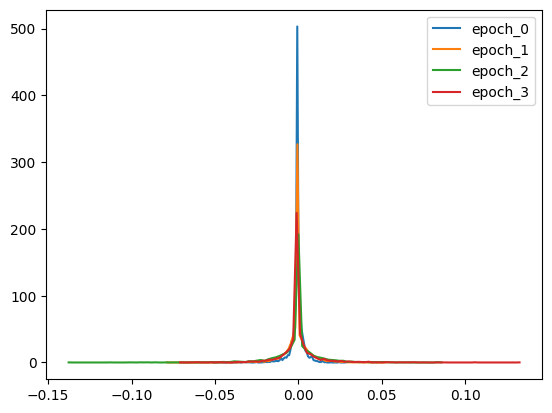

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

legends = []
for i, g in enumerate(grads[1:]):
    hy, hx = torch.histogram(g, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'epoch_{i}')
plt.legend(legends)

#### inspect weights across epochs 

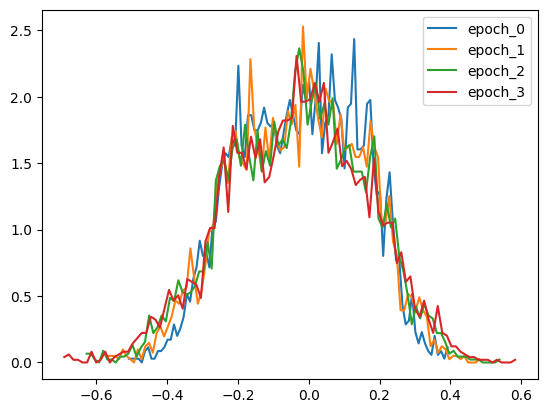

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

legends = []
for i, g in enumerate(weights[1:]):
    hy, hx = torch.histogram(g, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'epoch_{i}')
plt.legend(legends)

# Code will be different from here onwards

- The goal is to generate pos and negative samples on the fly
- - https://github.com/adambielski/siamese-triplet/blob/master/datasets.py

In [11]:
features = data2.columns[:-1]
label = data2.columns[-1]

import torch
from sklearn.model_selection import train_test_split
X = torch.tensor(data2[features].values, dtype=torch.float32)
y = torch.tensor(data2[label].values, dtype=torch.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
import torch
import torch.nn as nn

random_state = np.random.RandomState(29)

class dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, train):
        ## MUST be float32. Remmeber to cast it manually
        self.X = X
        self.y = y
        self.train = train
        self.label_set = set(y.tolist())
        self.label_to_indices = {lab: np.where(y==lab)[0] for lab in self.label_set}
        samples = 200
            
        if not self.train:
#             print(self.label_to_indices)
            # generate a fixed set of positive and negative pairs
            pos_pairs = [(i, 
                          np.random.choice(self.label_to_indices[y[i].item()]), 1) for i in range(0,y.shape[0],2)]
            neg_pairs = [(i, np.random.choice(self.label_to_indices[
                np.random.choice(list(self.label_set - set([y[i].item()])))]),0) for i in range(1, y.shape[0], 2)]
            self.test_pairs = pos_pairs + neg_pairs
            
    def __getitem__(self, idx):
        if self.train:
            # determine if the label should be pos or neg
            target = torch.randint(0,2, size=(1,)) # 0 or 1
            # first label with its corresponding label
            xs_fp, ys_fp = self.X[idx], self.y[idx].item()

            # if choose to have positive sample
            if target.item() == 1:
                siamese_idx = idx
                # choose from a index that also have the same label as ys_fp
                siamese_idx = np.random.choice(self.label_to_indices[self.y[idx].item()])

                # dont sample yourself
                while siamese_idx == idx:
                    siamese_idx = np.random.choice(self.label_to_indices[self.y[idx].item()])
                # seelct the second pair (sp)
                xs_sp = self.X[siamese_idx]
            else:
                # if we choose to have negative sample
                candidate_set = list(self.label_set - set([ys_fp]))
                candidate_choice = np.random.choice(candidate_set)
                # choose from an index that does not have the same label ys_fp
                siamese_idx = np.random.choice(self.label_to_indices[candidate_choice])
                xs_sp = self.X[siamese_idx]
        else:
            ## for test set, we do not want randomization
            xs_fp_idx, xs_sp_idx, target = self.test_pairs[idx][0], self.test_pairs[idx][1], self.test_pairs[idx][2]
            xs_fp = self.X[xs_fp_idx]
            xs_sp = self.X[xs_sp_idx]
            siamese_idx = 0
            
        return xs_fp, xs_sp, target, idx, siamese_idx
            
    def __len__(self):
        return len(self.X)
    

train = dataset(X_train, y_train, train=True)

test = dataset(X_test, y_test, train=False)

batch_size = 512
siamese_train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
siamese_test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [16]:
# sample data from batch
# set shuffle to false for debugging
siamese_train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=False)
xs1, xs2, target, idx, siamese_idx = next(iter(siamese_train_loader))

## Validate that dataset is correct

In [23]:
# check distribution of pos and neg sample
target.view(-1).bincount()

tensor([257, 255])

In [24]:
# check that pos examples are pos examples, neg exampels are neg examples
sample = {'target': target.detach().numpy().squeeze().tolist(),
    'idx': idx.detach().numpy().squeeze().tolist(),
    'siamese_idx': siamese_idx.detach().numpy().squeeze().tolist()}
sample_pd = pd.DataFrame(sample)
sample_pd.head()

,target,idx,siamese_idx
0,0,0,2276
1,0,1,1119
2,1,2,1199
3,0,3,1772
4,1,4,3274


In [33]:
y_train_pd = pd.DataFrame(y_train)
for idx, (t, i, s) in sample_pd.iterrows():
    # index of the anchored example
    i_lab = y_train_pd.iloc[i][0]
    # index of the chosen random example
    siamese_lab = y_train_pd.iloc[s][0]
    # if same label, then label should be 1, not 0
    if (i_lab == siamese_lab) and t == 0:
        print(False)
    # if different label, then label should be 0, not 1
    if (i_lab != siamese_lab) and t == 1:
        print(False)
print('all true')

all true


### Train the same model, with the same parameters again

In [35]:
# shuffle train loader again
siamese_train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)

In [40]:
import torch.nn.functional as F

# instantiate siamese network
model = SiameseNetwork(layers=[15, 256, 256, 256])

import torch.optim as optim

# set margin to 1
margin = 1.
# define loss function
loss_fn = ContrastiveLoss(margin)
# define learning rate
lr = 1e-3
# define optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
n_epochs = 10

losses = []
weights = []
grads = []
for ep in range(n_epochs):
    losses = []
    accs = []
    for batch_idx, (x1, x2, target,_,_) in enumerate(siamese_train_loader):
        out1, out2 = model(x1, x2)
        loss = loss_fn(out1, out2, target, size_average=True)

        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            acc,p = accuracy(out1, out2, target)
            accs.append(acc.item())
            
        if batch_idx == len(siamese_train_loader)-1: #(batch_idx % log_interval) == 0:
            samples_used = (batch_idx * x1.shape[0])
            samples_in_epoch = len(dataloader.dataset)
            batches_used = (batch_idx)
            batches_in_epoch = len(dataloader)
            batch_progress = 100 * (batches_used / batches_in_epoch)
    
            message = f'[Epoch: {ep}] Train: [{samples_used}/{samples_in_epoch} {batch_progress:.0f}]\t Loss: {np.mean(losses)}\nAcc:{np.mean(accs)}'
            print(message)
            ## append weight of first linear layer
            weights.append(model.module_list[-1].weight.clone())
            ## append gradient of first linear layer
            grads.append(model.module_list[-1].weight.grad)
            losses.append(np.mean(losses))

[Epoch: 0] Train: [1920/663577 0]	 Loss: 0.143372648528644
Acc:0.5074218767029899
[Epoch: 1] Train: [1920/663577 0]	 Loss: 0.12984290293284825
Acc:0.5151227712631226
[Epoch: 2] Train: [1920/663577 0]	 Loss: 0.1267434741769518
Acc:0.534486608845847
[Epoch: 3] Train: [1920/663577 0]	 Loss: 0.12692117052418844
Acc:0.5193638375827244
[Epoch: 4] Train: [1920/663577 0]	 Loss: 0.12648545631340571
Acc:0.5189732142857143
[Epoch: 5] Train: [1920/663577 0]	 Loss: 0.12619200135980332
Acc:0.5100446428571429
[Epoch: 6] Train: [1920/663577 0]	 Loss: 0.12592358674321855
Acc:0.5193638375827244
[Epoch: 7] Train: [1920/663577 0]	 Loss: 0.1261627354792186
Acc:0.5233258945601327
[Epoch: 8] Train: [1920/663577 0]	 Loss: 0.12602555113179342
Acc:0.5186941964285714
[Epoch: 9] Train: [1920/663577 0]	 Loss: 0.12577053053038462
Acc:0.5178571428571429


##### We see that the network does not learn 

#### plot gradients across epoch

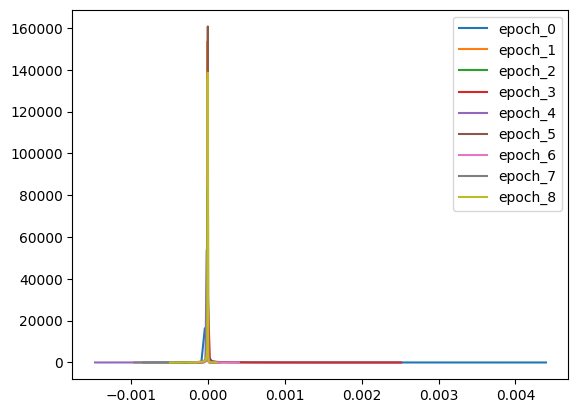

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

legends = []
for i, g in enumerate(grads[1:]):
    hy, hx = torch.histogram(g, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'epoch_{i}')
plt.legend(legends)

#### plot weight across epochs

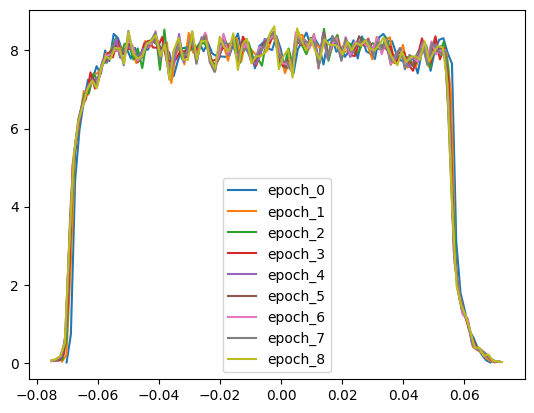

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

legends = []
for i, g in enumerate(weights[1:]):
    hy, hx = torch.histogram(g, density=True)
    plt.plot(hx[:-1].detach(), hy.detach())
    legends.append(f'epoch_{i}')
plt.legend(legends)